# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [66]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
cities = []

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities
# cities = ["Paris", "London", "Oslo", "Beijing"]

['busselton',
 'baturaja',
 'dolzhanskaya',
 'sao filipe',
 'barrow',
 'nelson bay',
 'usinsk',
 'port alfred',
 'vaini',
 'halalo',
 'maldonado',
 'moerai',
 'port blair',
 'rikitea',
 'bluff',
 'yar-sale',
 'samarai',
 'japura',
 'maragogi',
 'port keats',
 'san cristobal',
 'cape town',
 'haines junction',
 'kamenskoye',
 'cururupu',
 'bulgan',
 'dikson',
 'ushuaia',
 'ambulu',
 'san policarpo',
 'vanimo',
 'albany',
 'kapaa',
 'saint-prosper',
 'hithadhoo',
 'torbay',
 'neuquen',
 'illoqqortoormiut',
 'caluquembe',
 'hermanus',
 'arraial do cabo',
 'college',
 'port hedland',
 'rawannawi',
 'qasigiannguit',
 'nemuro',
 'fairbanks',
 'mar del plata',
 'petilia policastro',
 'payo',
 'karratha',
 'alihe',
 'pevek',
 'upernavik',
 'kodiak',
 'lorengau',
 'tiksi',
 'faya',
 'norman wells',
 'meyungs',
 'faanui',
 'hobart',
 'leningradskiy',
 'amiens',
 'lolua',
 'mys shmidta',
 'tasiilaq',
 'puerto ayacucho',
 'honiara',
 'avarua',
 'bambous virieux',
 'ilhabela',
 'puerto ayora',
 'ja

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [67]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Creating empty list
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
MaxTemp = []
WindSpeed = []

#looping through all cities
for city in cities:
    # Build query URL
    query_url = url + "appid=" + api_key + "&q=" + city
    # Query API
    response = requests.get(query_url).json()
    response
    # adding the valid response to the lists inside try block, to avoid exceptions when the request didn't find any city
    try:
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        MaxTemp.append(response['main']['temp_max'])
        WindSpeed.append(response['wind']['speed'])
    # Except block will print a message for the cities that did not receive any response
    except:
        print("City does not exist")
    

# writing all lists to a dictionary
CityWeather_dict = {
    "Cloudiness":Cloudiness,
    "Country":Country,
    "Date":Date,
    "Humidity":Humidity,
    "Lat":Lat,
    "Lng":Lng,
    "MaxTemp":MaxTemp,
    "WindSpeed":WindSpeed
}


City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [68]:
# creating a dataframe from dictionary
CityWeatherData_df = pd.DataFrame(CityWeather_dict)
# writing the dataframe into a csv
CityWeatherData_df.to_csv('CityData.csv')
# displaying the dattaframe
CityWeatherData_df

,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed
0,100,AU,1538956971,100,-33.64,115.35,287.866,4.55
1,0,ID,1538957229,80,-4.12,104.17,298.666,3.05
2,0,RU,1538957229,100,46.63,37.80,287.441,7.80
3,0,CV,1538957229,97,14.90,-24.50,299.616,5.80
4,56,AR,1538957230,36,-38.31,-60.23,296.866,7.25
5,75,AU,1538955000,64,-32.72,152.14,293.150,5.10
6,88,RU,1538957230,98,66.00,57.56,275.816,4.95
7,0,ZA,1538957230,90,-33.59,26.89,293.441,7.90
8,24,IN,1538957230,90,15.34,74.49,293.841,1.15
9,0,UY,1538953200,82,-34.91,-54.96,292.150,3.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

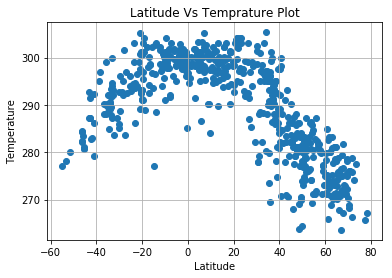

In [69]:
# Build a scatter plot for each data type
plt.scatter(CityWeatherData_df["Lat"], CityWeatherData_df["MaxTemp"], marker="o", alpha=1)

# Incorporate the other graph properties
plt.title("Latitude Vs Temprature Plot")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

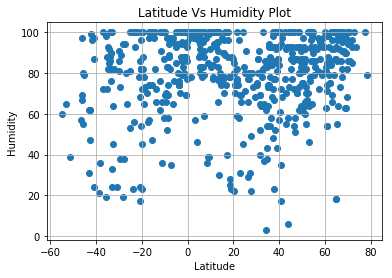

In [70]:
# Build a scatter plot for each data type
plt.scatter(CityWeatherData_df["Lat"], CityWeatherData_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude Vs Humidity Plot")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

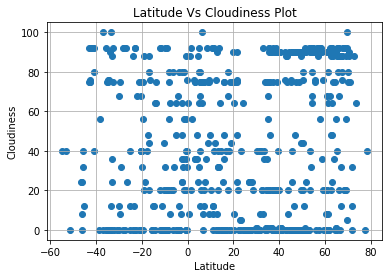

In [71]:
# Build a scatter plot for each data type
plt.scatter(CityWeatherData_df["Lat"], CityWeatherData_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude Vs Cloudiness Plot")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

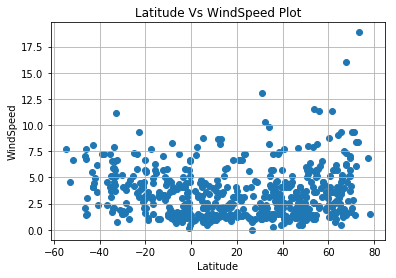

In [72]:
# Build a scatter plot for each data type
plt.scatter(CityWeatherData_df["Lat"], CityWeatherData_df["WindSpeed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude Vs WindSpeed Plot")
plt.ylabel("WindSpeed")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()